### Library Imports for Data Shaping and Numerical Ops

In [1]:
import pandas as pd
import numpy as np

In [65]:
rawData = pd.read_csv("train.csv")

In [66]:
rawData.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [67]:
rawData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [68]:
extractTitle = lambda s :s.split(",")[1].split(".")[0]
rawData['Titles'] = rawData.Name.apply(extractTitle)
rawData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [69]:
import seaborn as sns 
rawData.head(10)
rawData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Titles           0
dtype: int64

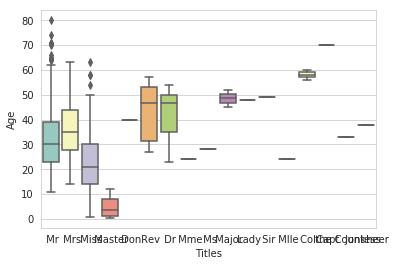

In [70]:
ax = sns.boxplot(x="Titles", y="Age",data= rawData, palette="Set3")

In [71]:
rawData.groupby(['Titles'])[['Age']].median()

,Age
Titles,
Capt,70.0
Col,58.0
Don,40.0
Dr,46.5
Jonkheer,38.0
Lady,48.0
Major,48.5
Master,3.5
Miss,21.0


In [73]:
rawData["Age"] = rawData.groupby("Titles")['Age'].transform(lambda x: x.fillna(x.median()))

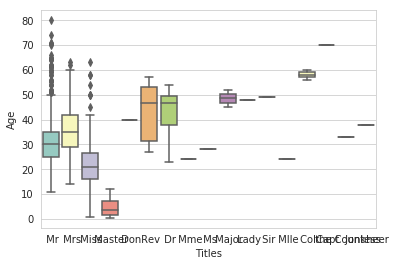

In [75]:
ax = sns.boxplot(x="Titles", y="Age",data= rawData, palette="Set3")

In [76]:
rawData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Titles           0
dtype: int64

In [82]:
train = rawData

In [84]:
test = pd.read_csv("test.csv")

In [89]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Titles           0
dtype: int64

In [90]:
test['Titles'] = rawData.Name.apply(extractTitle)
test["Age"] = rawData.groupby("Titles")['Age'].transform(lambda x: x.fillna(x.median()))

In [109]:
X = train[['Pclass','Sex','Age','Titles','SibSp','Parch','Fare','Embarked']]
X['Pclass']= X.Pclass.astype('category')
X= pd.get_dummies(X)
Y = train[['Survived']]
X.head(10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Titles_ Capt,...,Titles_ Mme,Titles_ Mr,Titles_ Mrs,Titles_ Ms,Titles_ Rev,Titles_ Sir,Titles_ the Countess,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
5,30.0,0,0,8.4583,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
6,54.0,0,0,51.8625,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7,2.0,3,1,21.0750,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,27.0,0,2,11.1333,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
9,14.0,1,0,30.0708,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [110]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [112]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.64818
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.611818
[2]	validation_0-logloss:0.58212
[3]	validation_0-logloss:0.557122
[4]	validation_0-logloss:0.536426
[5]	validation_0-logloss:0.519238
[6]	validation_0-logloss:0.504885
[7]	validation_0-logloss:0.493062
[8]	validation_0-logloss:0.483249
[9]	validation_0-logloss:0.476688
[10]	validation_0-logloss:0.470671
[11]	validation_0-logloss:0.466482
[12]	validation_0-logloss:0.46317
[13]	validation_0-logloss:0.460386
[14]	validation_0-logloss:0.457981
[15]	validation_0-logloss:0.456248
[16]	validation_0-logloss:0.454593
[17]	validation_0-logloss:0.453382
[18]	validation_0-logloss:0.452742
[19]	validation_0-logloss:0.452067
[20]	validation_0-logloss:0.451273
[21]	validation_0-logloss:0.451105
[22]	validation_0-logloss:0.451389
[23]	validation_0-logloss:0.451511
[24]	validation_0-logloss:0.451595
[25]	validation_0-logloss:0.451448
[26]	validation_0-logloss:0.452707


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [114]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.34%


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [144]:
testRawData = pd.read_csv("test.csv")
testRawData.head(10)
# Code for cleaning and shaping the Data 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [123]:
testRawData['Titles'] = rawData.Name.apply(extractTitle)
testRawData["Age"] = testRawData.groupby("Titles")['Age'].transform(lambda x: x.fillna(x.median()))
X_Predict = testRawData[['Pclass','Sex','Age','Titles','SibSp','Parch','Fare','Embarked']]
X_Predict['Pclass']= X_Predict.Pclass.astype('category')
X_Predict= pd.get_dummies(X_Predict)
print X_Predict.head(10)

    Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0  34.5      0      0   7.8292         0         0         1           0   
1  47.0      1      0   7.0000         0         0         1           1   
2  62.0      0      0   9.6875         0         1         0           0   
3  27.0      0      0   8.6625         0         0         1           0   
4  22.0      1      1  12.2875         0         0         1           1   
5  14.0      0      0   9.2250         0         0         1           0   
6  30.0      0      0   7.6292         0         0         1           1   
7  26.0      1      1  29.0000         0         1         0           0   
8  18.0      0      0   7.2292         0         0         1           1   
9  21.0      2      0  24.1500         0         0         1           0   

   Sex_male  Titles_ Don  Titles_ Dr  Titles_ Master  Titles_ Miss  \
0         1            0           0               0             0   
1         0            

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [145]:
xPredictColNames = list(X_Predict)
xTrainColNames = list(X_train)
# Y_Predict = model.predict(X_Predict)
print xPredictColNames

['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Titles_ Don', 'Titles_ Dr', 'Titles_ Master', 'Titles_ Miss', 'Titles_ Mme', 'Titles_ Mr', 'Titles_ Mrs', 'Titles_ Rev', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 890, 'Titles_ Jonkheer', 'Titles_ Capt', 'Titles_ Sir', 'Titles_ Major', 'Titles_ Mlle', 'Titles_ Lady', 'Titles_ Col', 'Titles_ the Countess', 'Titles_ Ms']


In [146]:
for name in list(set(xTrainColNames)- set(xPredictColNames)):
    X_Predict[name] = 0

In [147]:
xPredictColNames = list(X_Predict)
xTrainColNames = list(X_train)
# Y_Predict = model.predict(X_Predict)
print (set(xTrainColNames)- set(xPredictColNames))

set([])


In [163]:
xPredictColNames = list(X_Predict)
xPredictColNames

['Age',
 'SibSp',
 'Parch',
 'Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Titles_ Don',
 'Titles_ Dr',
 'Titles_ Master',
 'Titles_ Miss',
 'Titles_ Mme',
 'Titles_ Mr',
 'Titles_ Mrs',
 'Titles_ Rev',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Titles_ Jonkheer',
 'Titles_ Capt',
 'Titles_ Sir',
 'Titles_ Major',
 'Titles_ Mlle',
 'Titles_ Lady',
 'Titles_ Col',
 'Titles_ the Countess',
 'Titles_ Ms']

In [164]:
del X_Predict[890]

KeyError: 890

In [172]:
Y_Predict = model.predict(X_Predict)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [170]:
print (set(xTrainColNames)- set(xPredictColNames))
print (set(xPredictColNames)- set(xTrainColNames))

set([])
set([])


In [175]:
X_Predict = X_Predict[xTrainColNames]

In [178]:
testRawData['Survived'] = model.predict(X_Predict) 

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [183]:
testRawData.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [194]:
submission= testRawData[['PassengerId','Survived']]
submission.to_csv('titanicResults.csv', index= False)
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
